# Diabetes Prediction

##### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load and read the dataset
diabetes = pd.read_csv('diabetes.csv')

#view the first few rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Understanding the columns

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

## Exploratory Data Analysis

In [3]:
#check the shape of the data

diabetes.shape

(768, 9)

In [4]:
# check the information of the data

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# check for missing values

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# check for duplicated values

diabetes.duplicated().sum() 

0

In [7]:
# check the statistics of the data

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# check for imbalance

diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

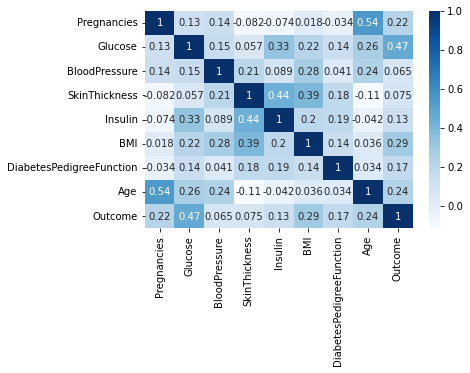

In [9]:
# check for correlation

sns.heatmap(diabetes.corr(), annot=True, cmap='Blues')

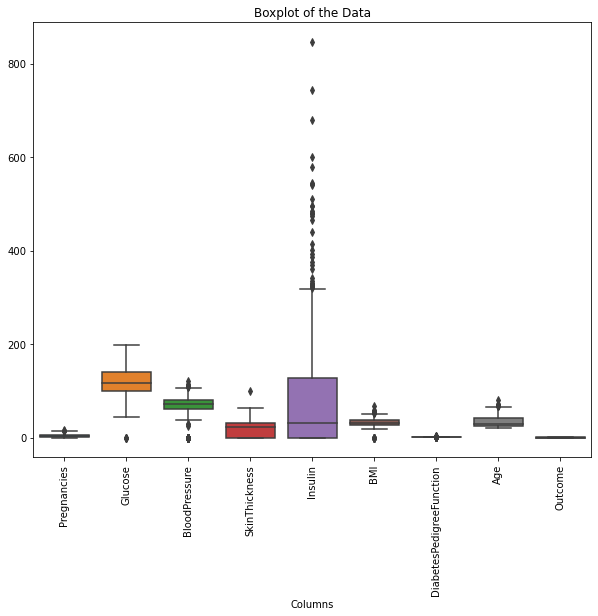

In [10]:
# check for outliers

plt.figure(figsize=(10,8))
sns.boxplot(data = diabetes)
plt.title('Boxplot of the Data')
plt.xticks(rotation = 90)
plt.xlabel('Columns')
plt.show()

### Observations

- The data has 768 row and 9 columns

- There are no missing values in the data

- There are no duplicate values in the data

- All the columns are in numerical values

- The class is somewhat imbalanced

- There's a lot of outliers in the insulin column

- Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction,Age are somewhat correlated to the target column

### Data Cleaning

In [11]:
#cleaning glucose column

diabetes[diabetes['Glucose'] <=0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
#cleaning glucose column by replacing 0 as Nan and filling the null values with actual values

diabetes['Glucose'] = diabetes['Glucose'].replace(0,np.nan)
diabetes['Glucose'] = diabetes['Glucose'].interpolate(method = 'linear').astype(int)

In [13]:
#cleaning bloodPressure column

diabetes[diabetes['BloodPressure'] <=60]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
13,1,189,60,23,846,30.1,0.398,59,1
15,7,100,0,0,0,30.0,0.484,32,1
...,...,...,...,...,...,...,...,...,...
738,2,99,60,17,160,36.6,0.453,21,0
741,3,102,44,20,94,30.8,0.400,26,0
742,1,109,58,18,116,28.5,0.219,22,0
760,2,88,58,26,16,28.4,0.766,22,0


In [14]:
#cleaning BloodPressure column by replacing  values less than 60 as Nan and filling the null values with actual values

diabetes['BloodPressure']= np.where(diabetes['BloodPressure']<=60, np.nan, diabetes['BloodPressure'])

# diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,np.nan)
diabetes['BloodPressure'] = diabetes['BloodPressure'].fillna(method = 'ffill').astype(int)

In [15]:
#insulin

diabetes[diabetes['Insulin']<= 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,74,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,72,0,0,30.1,0.349,47,1


In [16]:
diabetes['Insulin']= np.where(diabetes['Insulin']<=0, np.nan, diabetes['Insulin'])

diabetes['Insulin']= diabetes['Insulin'].fillna(diabetes['Insulin'].median()).astype(int)

In [17]:
#viewing the data again

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,0,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,66,35,168,43.1,2.288,33,1


### Observations

No blood pressure, insulin level, or glucose level can be zero in the context of health care.

### Data Visualization

Questions to ask the data

- Does the likelihood of developing diabetes rise with the number of pregnancies?

- Does a person's blood glucose level influence their risk of developing diabetes?

- Is there a positive correlation between blood pressure and the risk of diabetes?

- Does your risk of developing diabetes increase with your BMI?

- Is your chance of developing diabetes higher as you age?


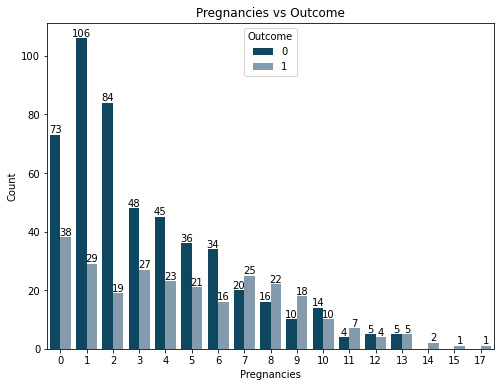

In [18]:
# - Does the likelihood of developing diabetes rise with the number of pregnancies?
plt.figure(figsize=(8,6))  

sns.set_palette(['#004c6d','#7d9cb5'])

ax = sns.countplot(x = 'Pregnancies', hue = 'Outcome', data=diabetes)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.title('Pregnancies vs Outcome')
plt.show()


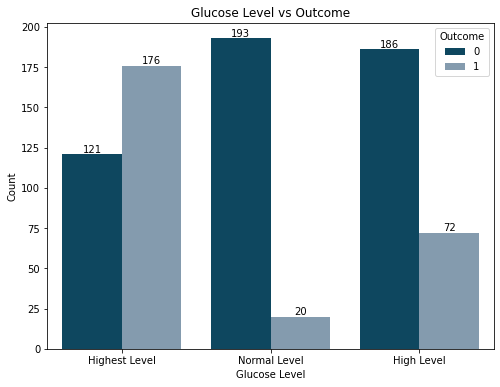

In [19]:
# - Does a person's blood glucose level influence their risk of developing diabetes?

# Normal Level: <=100

# High Level: 100-125

# Highest Level: 126 or higher



def glucose(Glu):
  if Glu<=100:
    return 'Normal Level'
  elif Glu<=125:
    return 'High Level'
  else:
    return 'Highest Level'
  
plt.figure(figsize=(8,6))    
sns.set_palette(['#004c6d','#7d9cb5'])
diabetes['Glucose_level'] = diabetes['Glucose'].apply(glucose)
ax = sns.countplot(x = 'Glucose_level', hue = 'Outcome', data=diabetes)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.title('Glucose Level vs Outcome')
plt.show()

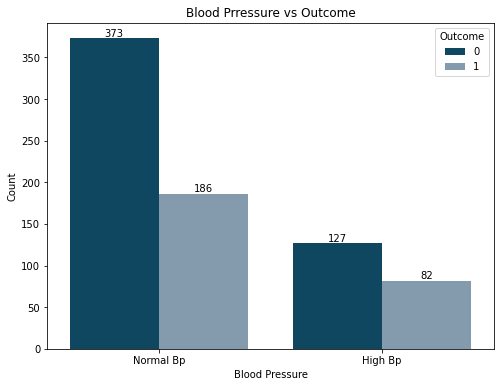

In [20]:
# Is there a positive correlation between blood pressure and the risk of diabetes?

# normal bp: less than 80

# high bp: greater than 80

def bp(BP):
    if BP<=80:
        return 'Normal Bp'
    else:
        return 'High Bp'

  
plt.figure(figsize=(8,6))    
  
sns.set_palette(['#004c6d','#7d9cb5'])
diabetes['BP'] = diabetes['BloodPressure'].apply(bp)
ax = sns.countplot(x = 'BP', hue = 'Outcome', data=diabetes)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.title('Blood Prressure vs Outcome')
plt.show()


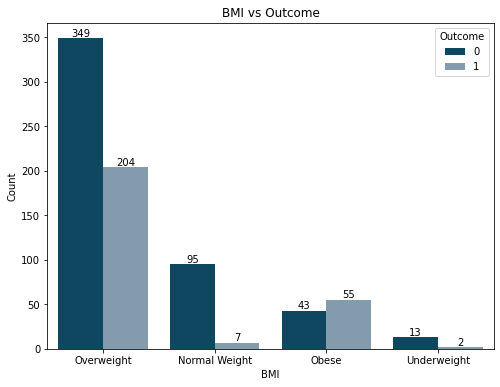

In [21]:
# Does your risk of developing diabetes increase with your BMI?
# Underweight: <= 18.4 kg/m^2.

# Normal weight: 18.5 - 24.9 kg/m^2.

# Overweight: 25.0 - 39.9 kg/m^2.

# Obese:>= 40.0 kg/m^2.





def bmi(BMI):
  if BMI<=18.4:
    return 'Underweight'
  elif BMI<=24.9:
    return 'Normal Weight'
  elif BMI<=39.9:
    return 'Overweight'
  else:
    return 'Obese'
  
plt.figure(figsize=(8,6))    
  
sns.set_palette(['#004c6d','#7d9cb5'])
diabetes['BMI_weight'] = diabetes['BMI'].apply(bmi)
ax = sns.countplot(x = 'BMI_weight', hue = 'Outcome', data=diabetes)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI vs Outcome')
plt.show()

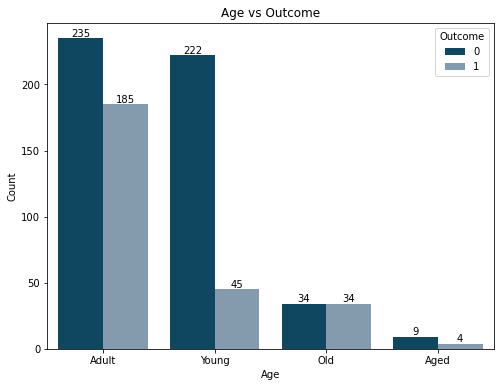

In [22]:
# Is your chance of developing diabetes higher as you age?

def age(Age):
    if Age<=25:
        return 'Young'
    elif Age<=50:
        return 'Adult'
    elif Age<=65:
        return 'Old'
    else:
        return 'Aged'

plt.figure(figsize=(8,6))    
sns.set_palette(['#004c6d','#7d9cb5'])
diabetes['Age_group'] = diabetes['Age'].apply(age)
ax = sns.countplot(x = 'Age_group', hue = 'Outcome', data=diabetes)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age vs Outcome')
plt.show()

##### Key Findings:

- Age, glucose levels, and BMI appear to be factors influencing diabetes risk in the dataset.

- The number of pregnancies does not seem to be a significant factor affecting diabetes risk.

### Model Training

In [23]:
#drop the column used for visualizations

diabetes = diabetes.drop(diabetes.select_dtypes('object'), axis = 1)

In [24]:
#view the data again

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,0,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,66,35,168,43.1,2.288,33,1


In [25]:
#import neccesary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [26]:
#split the data
X = diabetes.drop('Outcome', axis = 1)
y = diabetes['Outcome']

In [27]:
# split into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=456)

#### KNeighborsClassifier

In [28]:
#instantiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
#fit and train the model
knn.fit(X_train, y_train)

#predict on test data
knn_pred = knn.predict(X_test)

#print the scores between test data and predicted data

accuracy_score(y_test, knn_pred)

0.7077922077922078

#### DecisionTreeClassifier

In [30]:
#instantiate the model

dtc = DecisionTreeClassifier( criterion='gini', random_state=456)

In [31]:
#fit and train the model

dtc.fit(X_train, y_train)

#predict on test data
dtc_pred = dtc.predict(X_test)

#print the scores between test data and predicted data

accuracy_score(y_test, dtc_pred)

0.6623376623376623

#### RandomForestClassifier

In [32]:
#instantiate the model

rfc = RandomForestClassifier(criterion='gini', random_state=456)

In [33]:
#fit and train the data

rfc.fit(X_train, y_train)

#predict on test data

rfc_pred = rfc.predict(X_test)

#print the scores between test data and predicted data

accuracy_score(y_test, rfc_pred)

0.7467532467532467

#### GradientBoostingClassifier

In [34]:
#instantiate the model

gbc = GradientBoostingClassifier(max_depth=6,random_state=456)

In [35]:
#fit and train the data

gbc.fit(X_train, y_train)

#predict on test data

gbc_pred = gbc.predict(X_test)

#print the scores between test data and predicted data

accuracy_score(y_test, gbc_pred)

0.7597402597402597

#### Hyperparameter Tuning

#### KNeighborsClassifier

In [36]:
#define parameters for tuning

params = {'n_neighbors': range(1,21),
          'metric': ['euclidean', 'manhattan'],
          'weights': ['distance','uniform']  
}

In [37]:
#instantiate the model


knn_search = GridSearchCV(knn, param_grid=params, cv=5, verbose=1)

In [38]:
# fit and train the model

knn_search.fit(X_train, y_train)

#print best parameters

print(knn_search.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}


In [39]:
#fitting the model with the new parameters

knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')

In [40]:
#fit and train the data

knn.fit(X_train, y_train)

#predict on test data

knn_new = knn.predict(X_test)

#print the accuracy between test anf predict data

accuracy_score(y_test, knn_new)

0.7207792207792207

#### DecisionTreeClassifier

In [41]:
#define parameters for tuning

params = {
        'max_depth': range(1,20),
        'criterion': ['entropy', 'gini'],
        'min_samples_split': [2,5,7,None],
        'min_samples_leaf': [1,2,4]
}

In [42]:
#instantiate the model

dtc_search = GridSearchCV(dtc, param_grid=params, cv=5, verbose=1)

In [43]:
# fit and train the model

dtc_search.fit(X_train, y_train)

#print best parameters

print(dtc_search.best_params_)

Fitting 5 folds for each of 456 candidates, totalling 2280 fits


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 5}


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
570 fits failed out of a total of 2280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
570 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\DELL\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 258, in fit
    if not 0.0 < self.min_samples_split <= 1.0:
TypeError: '<' not supported between instances of 'floa

In [44]:
#fitting the model with the new parameters

dtc_c = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split=5, min_samples_leaf=2, random_state=456)

In [45]:
#fit and train the data

dtc_c.fit(X_train, y_train)

#predict on test data

dtc_new = dtc_c.predict(X_test)

#print the accuracy between test and predict data
accuracy_score(y_test, dtc_new)

0.7922077922077922

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

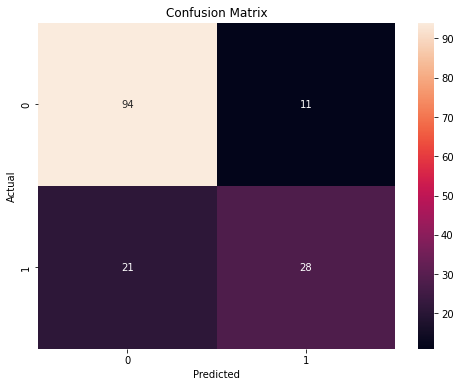

In [46]:
#confusion matrix
plt.figure(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(y_test, dtc_new), annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

#### In the first row (true class 1):

94 instances were correctly predicted as class 0.

11 instances of class 0 were incorrectly predicted as class 1.

#### In the second row (true class 2):

21 instances of class 1 were incorrectly predicted as class 0.

28 instances were correctly predicted as class 1.


#### RandomForestClassifier

In [47]:
#define parameters for tuning

params = {
        'max_depth': range(1,10),
        'n_estimators': range(1,600),
        'min_samples_leaf': [2,5,7],
        'criterion': ['entropy', 'gini'],
        'bootstrap': [True, False],
        'max_features': ['auto','sqrt']
}

In [48]:
#instantiate the model

rfc_search = RandomizedSearchCV(rfc, param_distributions=params, cv=5, verbose=1, random_state=456)

In [49]:
#fit the model

rfc_search.fit(X_train, y_train)

#print best parameters

print(rfc_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 293, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [50]:
#fitting the model with the new parameters

rfc_c = RandomForestClassifier(criterion='gini', max_depth=5, n_estimators=293, bootstrap=True, min_samples_leaf=2, max_features='sqrt',random_state=456)

In [51]:
#fit and train the data

rfc_c.fit(X_train, y_train)

#predict on test data

rfc_new = rfc_c.predict(X_test)

#print the accuracy between test data and predict data

accuracy_score(y_test, rfc_new)

0.7727272727272727

#### Observations


- Trained the model using a classification model such as GradientBoosting, RandomForest, DecisionTree, and KNeighbors.

- The accuracy percentages for Kneighbors, DecisionTree, RandomForest, and GradientBoositng were 70%, 66%, 75% and 76%, respectively.

##### After hypertuning the model:

- DecisionTree scored 79%, RandomForest scored 77%, and Kneighbors scored 72% for accuracy.

- The DecisionTree model performed fairly well in determining whether a patient has diabetes or not, with an accuracy of roughly 79% on the test set. This suggests that the program can identify patterns in the data to accurately predict a patient's probability of developing diabetes. It is essential to carefully evaluate the model's performance and consider its limits before to using it in a real-world scenario.

In [52]:
import pickle

pickle.dump(dtc_c,open('diabetes.pkl', 'wb'))